# Approximation

<div class="alert alert-block alert-info">
    <img style="float: right;" src="https://raw.githubusercontent.com/OpenSourceEconomics/ose-corporate-design/master/logos/OSE_logo_RGB.svg" width="150">
    <u><h1>Setup</h1></u>
</div>

<div class="alert alert-block alert-info">
    <u><h2>Polynomial interpolation</h2></u>
</div>

In [24]:
from approximation_problems import runge
import matplotlib.pyplot as plt
import warnings
import matplotlib.pyplot as plt
import pandas as pd
from itertools import product

index = product([10, 20, 30, 40, 50], np.linspace(-5, 5, 1000))
index = pd.MultiIndex.from_tuples(index, names=("Degree", "Grid"))
df = pd.DataFrame(columns=["Value", "Approximation"], index=index)


Value Approximation
Degree Grid                        
10     -5.00000   NaN           NaN
       -4.98999   NaN           NaN
       -4.97998   NaN           NaN
       -4.96997   NaN           NaN
       -4.95996   NaN           NaN
...               ...           ...
50      4.95996   NaN           NaN
        4.96997   NaN           NaN
        4.97998   NaN           NaN
        4.98999   NaN           NaN
        5.00000   NaN           NaN

[5000 rows x 2 columns]

In [75]:
df["Value"] = runge(df.index.get_level_values("Grid"))

for degree in df.index.get_level_values("Degree").unique():

    i = np.arange(degree, dtype=np.float64)
    xnodes = np.cos((2 * (i + 1) - 1) / (2 * degree) * np.pi)

    #xnodes = np.linspace(-5, 5, degree)
    c = np.polyfit(xnodes, runge(xnodes), degree)
    yfit = np.polyval(c, df.index.get_level_values("Grid").unique())
    df.loc[(degree, slice(None)), "Approximation"] = yfit

df["Error"] = df["Value"] - df["Approximation"]


def compute_interpolation_error(df):
    return np.log10(np.linalg.norm(df["Error"], np.inf))


df.groupby("Degree").apply(compute_interpolation_error)

Degree
10   -0.063011
20    1.697379
30    4.337308
40    4.935716
50    5.003346
dtype: float64

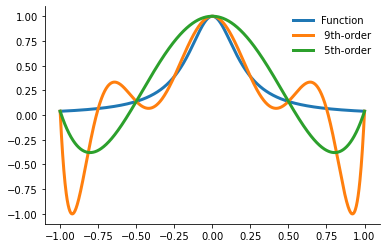

In [16]:
warnings.simplefilter("ignore")


a, b = -1, 1
xvals = np.linspace(a, b, 1000)
yvals = runge(xvals)

fig, ax = plt.subplots()

ax.plot(xvals, yvals, label="Function")


xnodes = np.linspace(a, b, 9)
c = np.polyfit(xnodes, runge(xnodes), 9)
yfit = np.polyval(c, xvals)
ax.plot(xvals, yfit, label=" 9th-order")


xnodes = np.linspace(a, b, 5)
c = np.polyfit(xnodes, runge(xnodes), 5)
yfit = np.polyval(c, xvals)
ax.plot(xvals, yfit, label=" 5th-order")

ax.legend()

### Research

*

### Resources

* https://relate.cs.illinois.edu/course/cs450-f18/file-version/a7a1965adf0479d36f1a34889afe55e2ec61a532/demos/upload/07-interpolation/Chebyshev%20interpolation.html

* https://www.unioviedo.es/compnum/labs/PYTHON/Interpolation.html

### References

* 